In [1]:
from random import random
import numpy as np
import utils as utils
from importlib import reload
import matplotlib.pyplot as plt
reload(utils)

<module 'utils' from '/Users/leandrosb/Documents/GitHub/broker-mfg/utils.py'>

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"

import matplotlib
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,amsfonts}')

In [3]:
%load_ext autoreload
%autoreload 2
np.random.seed(100)

## Environment 
The midprice for the stock is 
$$
dS_t = \alpha_t\,dt +b\,\nu^B_t\,dt + \sigma^s\,dW^S_t \,,
$$
where
$$
d \alpha_t = -\kappa^{\alpha}\,\alpha_t\, dt + \sigma^\alpha\,dW^{\alpha}_t\,.
$$

In [4]:
params = {'alpha0': 0, 'k_alpha': 5., 'sigma_alpha': 1., # common signal
              'S0': 100., 'sigma_s': 1.,
              'Q0I' : 0., 'etaI' : 1.0e-3, 'aI' : 1.0, 'phiI' : 1e-2,
              'Q0B' : 0., 'etaB' : 1.2e-3, 'aB' : 1.0, 'b' : 1e-3, 'phiB': 1e-2,
              'alphaI0': 0, 'kI' : 5., 'sigmaI' : 0.5, # individual signal 
              'T': 1., 'Nt': 10_000}

In [5]:
env = utils.MFG_broker_vs_informed(**params)

## First, let's plot all functions entering the Nash equilibrium trading speeds

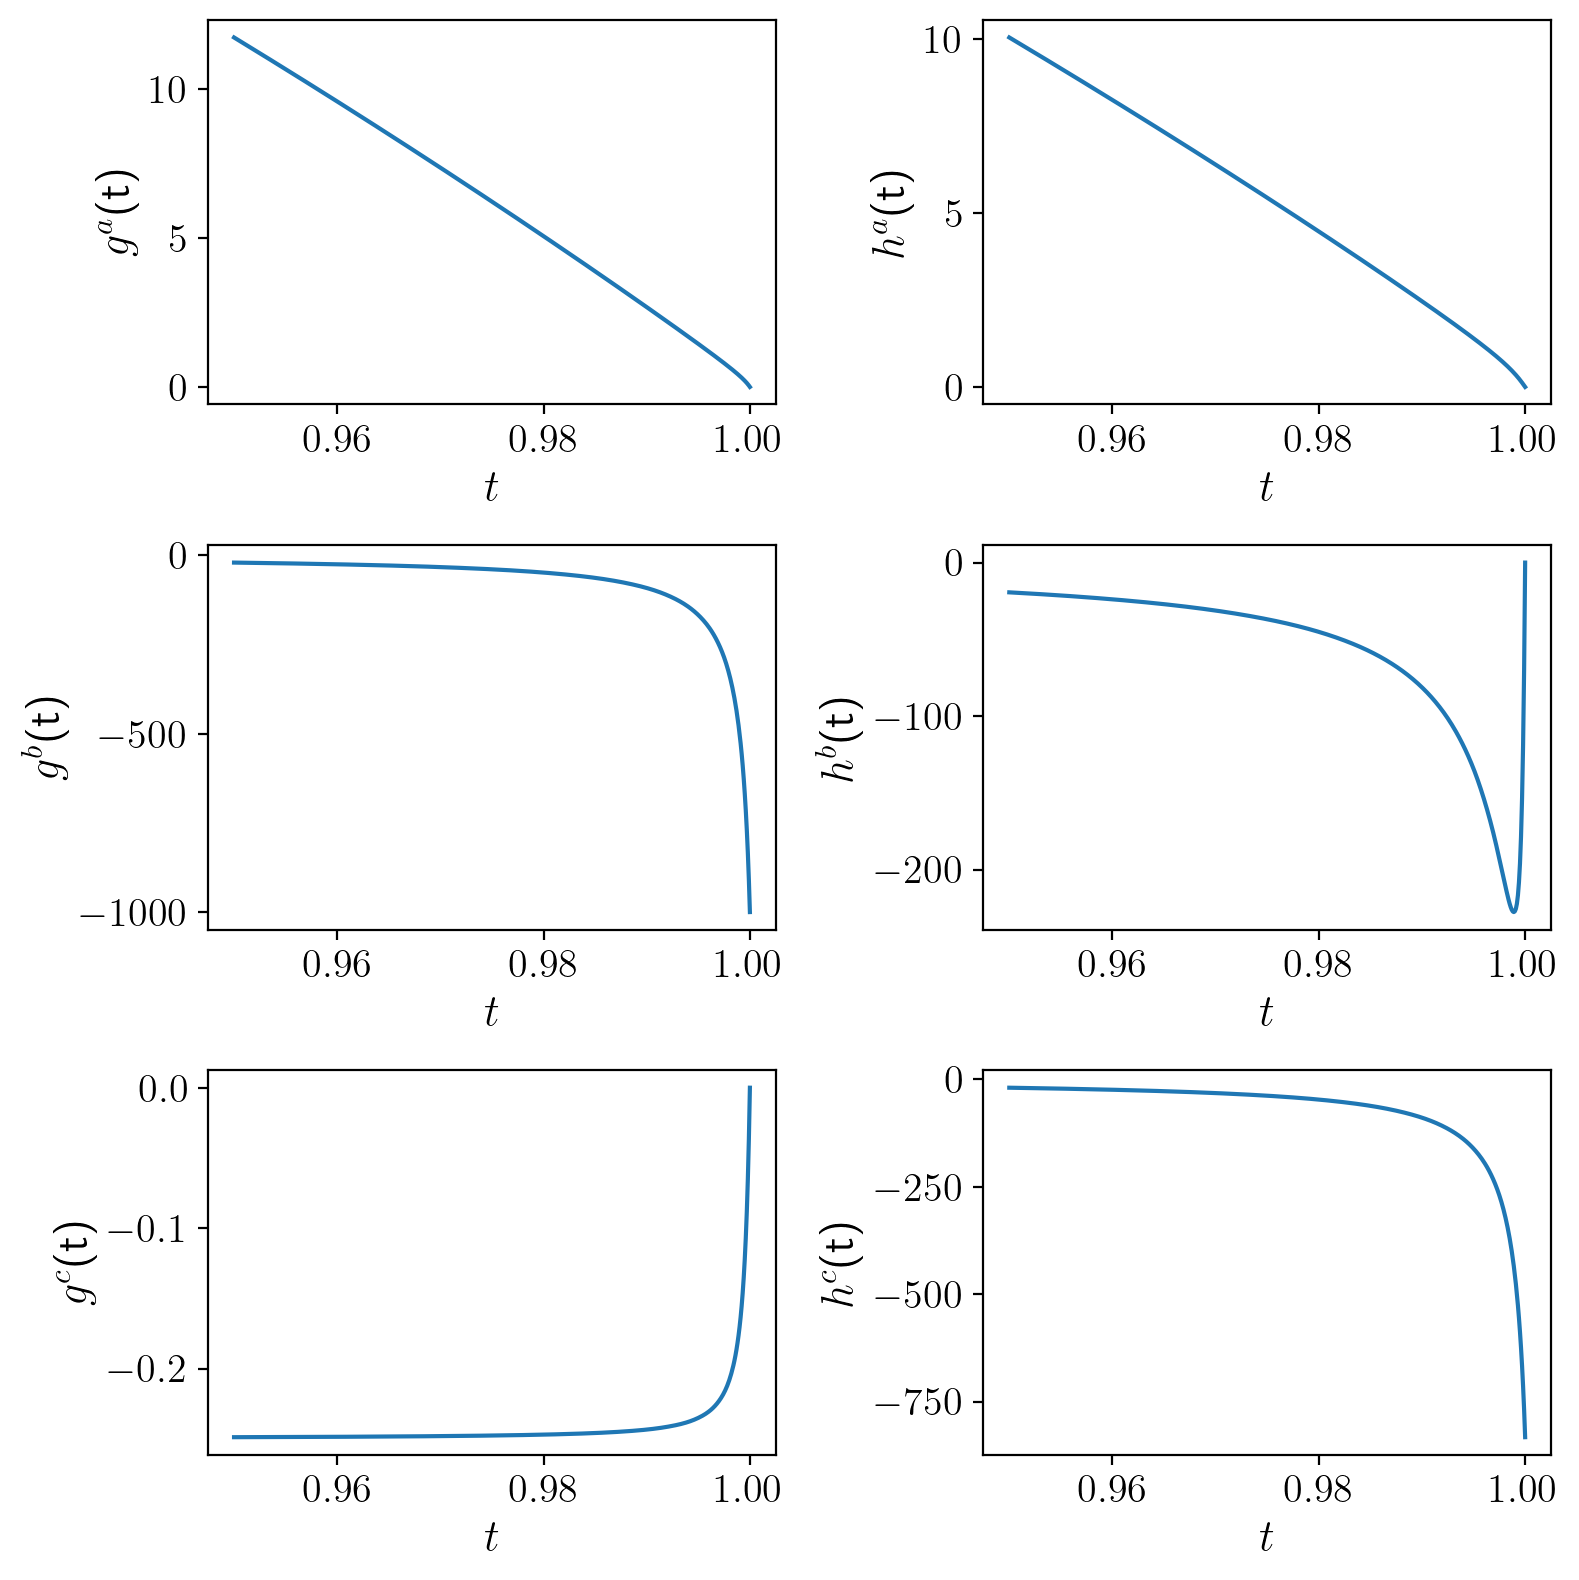

In [6]:
fig, ax = plt.subplots(3,2,figsize=(8,8))
idx = np.argwhere(env.timesteps>=0.95)

ax[0,0].plot(env.timesteps[idx], env.ga[idx])
ax[0,1].plot(env.timesteps[idx], env.ha[idx])
ax[1,0].plot(env.timesteps[idx], env.gb[idx])
ax[1,1].plot(env.timesteps[idx], env.hb[idx])
ax[2,0].plot(env.timesteps[idx], env.gc[idx])
ax[2,1].plot(env.timesteps[idx], env.hc[idx])


ax[0,0].set_xlabel(r'$t$', fontsize = 16)
ax[0,1].set_xlabel(r'$t$', fontsize = 16)
ax[1,0].set_xlabel(r'$t$', fontsize = 16)
ax[1,1].set_xlabel(r'$t$', fontsize = 16)
ax[2,0].set_xlabel(r'$t$', fontsize = 16)
ax[2,1].set_xlabel(r'$t$', fontsize = 16)

ax[0,0].set_ylabel(r'${g}^a$(t)', fontsize = 16)
ax[0,1].set_ylabel(r'${h}^a$(t)', fontsize = 16)
ax[1,0].set_ylabel(r'${g}^b$(t)', fontsize = 16)
ax[1,1].set_ylabel(r'${h}^b$(t)', fontsize = 16)
ax[2,0].set_ylabel(r'${g}^c$(t)', fontsize = 16)
ax[2,1].set_ylabel(r'${h}^c$(t)', fontsize = 16)

resolution_value = 100
plt.tight_layout()

plt.savefig('figures/time_dep_coefficients.pdf', format="pdf", dpi=resolution_value)
plt.show()

# Philippe's check

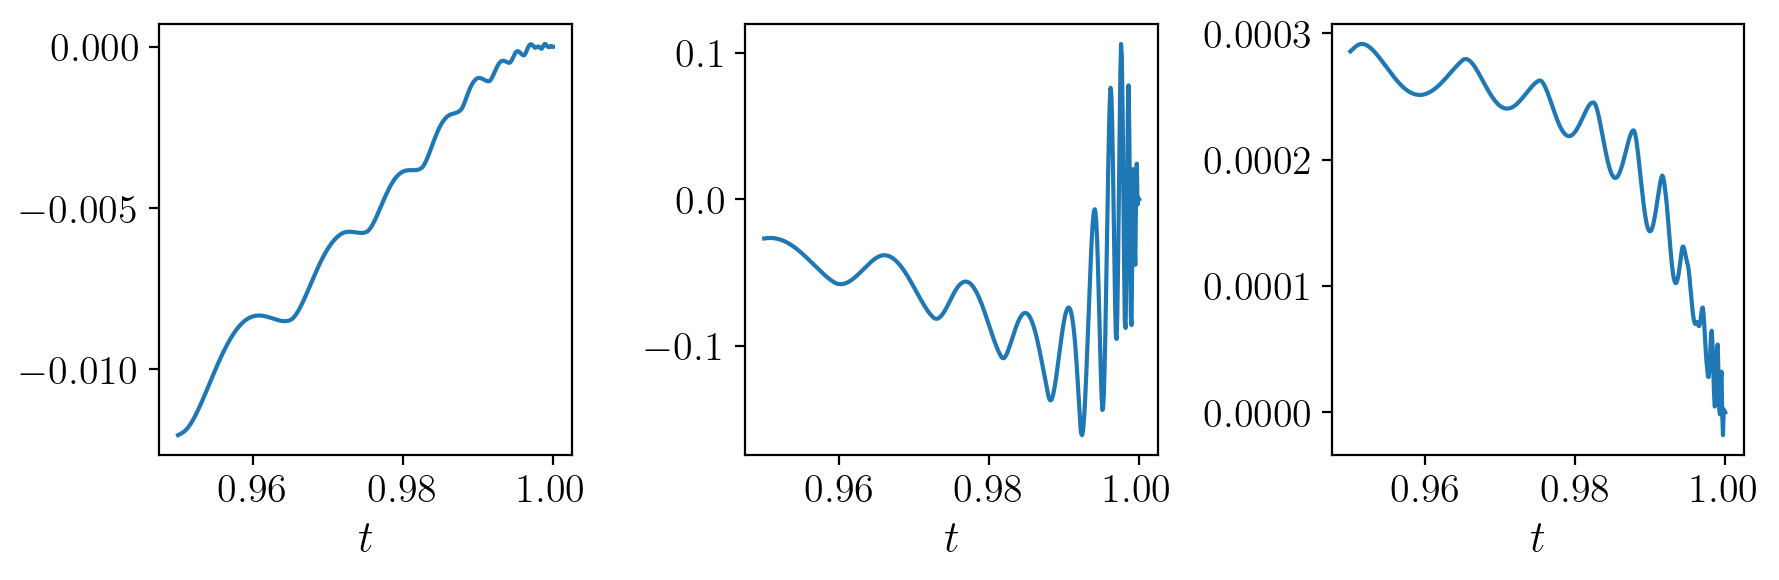

In [7]:
fig, ax = plt.subplots(1,3,figsize=(9,3))
idx = np.argwhere(env.timesteps>=0.95)

ax[0].plot(env.timesteps[idx], env.ga[idx] - env.fa[idx])
ax[1].plot(env.timesteps[idx], env.gb[idx] - (env.fb[idx] + env.fbI[idx] ) )
ax[2].plot(env.timesteps[idx], env.gc[idx] - env.fc[idx])


ax[0].set_xlabel(r'$t$', fontsize = 16)
ax[1].set_xlabel(r'$t$', fontsize = 16)
ax[2].set_xlabel(r'$t$', fontsize = 16)


resolution_value = 100
plt.tight_layout()

plt.show()

In [8]:
alpha, St, (X_I, Q_I, nu_I, MtM_I) , (X_B, Q_B, nu_B, MtM_B) , (X_U, Q_U, nu_U, MtM_U) = env.run_simulation_everybody(nsims = 10_000)

100%|███████████████████████████████████| 10000/10000 [00:04<00:00, 2328.79it/s]


In [9]:
qtl_alpha = np.quantile(alpha,[0.05,0.95], axis=1)
qtl_St = np.quantile(St,[0.05,0.95], axis=1)
qtl_nu_I = np.quantile(nu_I,[0.05,0.95], axis=1)
qtl_nu_B = np.quantile(nu_B,[0.05,0.95], axis=1)

qtl_Q_I = np.quantile(Q_I,[0.05,0.95], axis=1)
qtl_Q_B = np.quantile(Q_B,[0.05,0.95], axis=1)

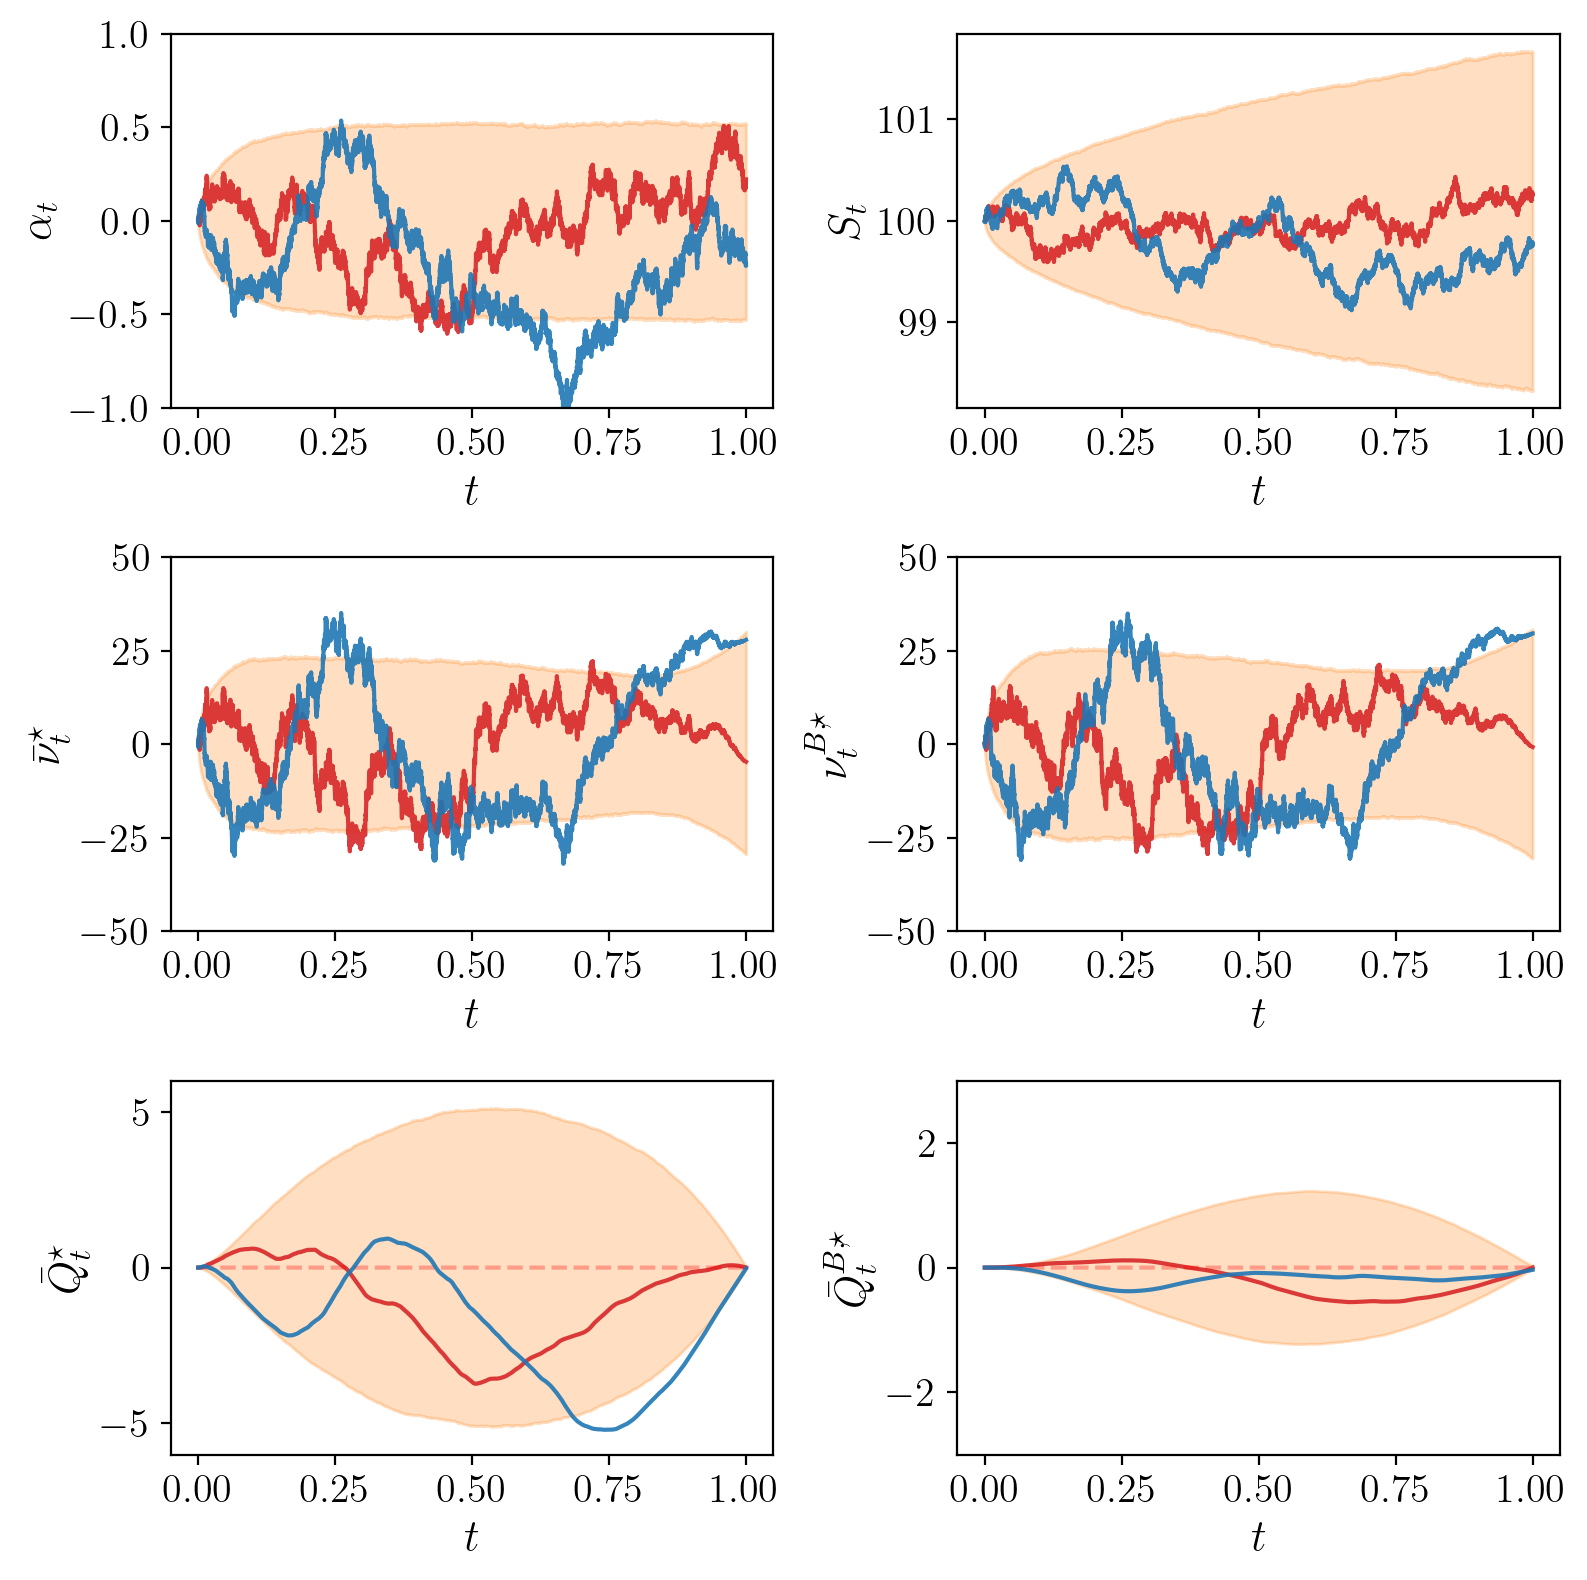

In [10]:
fig, ax = plt.subplots(3,2,figsize=(8,8))
idx = np.argwhere(env.timesteps<=1)
fill_colour = 'tab:orange'
sim = [0]

ax[0,0].plot(env.timesteps[idx], alpha[idx,sim],  'tab:red', alpha = 0.9)
ax[0,0].fill_between(env.timesteps[idx].reshape(-1,),qtl_alpha[0],qtl_alpha[-1],alpha=0.25, color=fill_colour)

ax[0,1].plot(env.timesteps[idx], St[idx,sim],  'tab:red', alpha = 0.9)
ax[0,1].fill_between(env.timesteps[idx].reshape(-1,),qtl_St[0],qtl_St[-1],alpha=0.25, color=fill_colour)

ax[1,0].plot(env.timesteps[idx], nu_I[idx,sim],'tab:red', alpha = 0.9)
ax[1,0].fill_between(env.timesteps[idx].reshape(-1,),qtl_nu_I[0],qtl_nu_I[-1],alpha=0.25, color=fill_colour)

ax[1,1].plot(env.timesteps[idx], nu_B[idx,sim],'tab:red', alpha = 0.9)
ax[1,1].fill_between(env.timesteps[idx].reshape(-1,),qtl_nu_B[0],qtl_nu_B[-1],alpha=0.25, color=fill_colour)


ax[2,0].plot(env.timesteps[idx], Q_I[idx,sim],  'tab:red',  alpha = 0.9)
ax[2,0].fill_between(env.timesteps[idx].reshape(-1,),qtl_Q_I[0],qtl_Q_I[-1],alpha=0.25, color=fill_colour)


ax[2,1].plot(env.timesteps[idx], Q_B[idx,sim],  'tab:red',  alpha = 0.9)
ax[2,1].fill_between(env.timesteps[idx].reshape(-1,),qtl_Q_B[0],qtl_Q_B[-1],alpha=0.25, color=fill_colour)

ax[2,0].plot(env.timesteps[idx], 0*Q_I[idx,sim], 'r--', alpha = 0.3)
ax[2,1].plot(env.timesteps[idx], 0*Q_B[idx,sim], 'r--', alpha = 0.3)

sim = [2]

ax[0,0].plot(env.timesteps[idx], alpha[idx,sim],  'tab:blue', alpha = 0.9)
ax[0,1].plot(env.timesteps[idx], St[idx,sim],  'tab:blue', alpha = 0.9)
ax[1,0].plot(env.timesteps[idx], nu_I[idx,sim],'tab:blue', alpha = 0.9)
ax[1,1].plot(env.timesteps[idx], nu_B[idx,sim],'tab:blue', alpha = 0.9)

ax[2,0].plot(env.timesteps[idx], Q_I[idx,sim],  'tab:blue',  alpha = 0.9)
ax[2,1].plot(env.timesteps[idx], Q_B[idx,sim],  'tab:blue',  alpha = 0.9)


ax[0,0].set_xlabel(r'$t$', fontsize = 16)
ax[0,1].set_xlabel(r'$t$', fontsize = 16)
ax[1,0].set_xlabel(r'$t$', fontsize = 16)
ax[1,1].set_xlabel(r'$t$', fontsize = 16)
ax[2,0].set_xlabel(r'$t$', fontsize = 16)
ax[2,1].set_xlabel(r'$t$', fontsize = 16)

ax[0,0].set_ylabel(r'$\alpha_t$', fontsize = 16)
ax[0,1].set_ylabel(r'$S_t$', fontsize = 16)
ax[1,0].set_ylabel(r'$\bar{\nu}^{\star}_t$', fontsize = 16)
ax[1,1].set_ylabel(r'$\nu^{B,\!\star}_t$', fontsize = 16)
ax[2,0].set_ylabel(r'$\bar{Q}^{\star}_t$', fontsize = 16)
ax[2,1].set_ylabel(r'$\bar{Q}^{B,\!\star}_t$', fontsize = 16)

# Custom
ax[0,0].set_ylim([-1,1])
ax[1,0].set_ylim([-50,50])
ax[1,1].set_ylim([-50,50])
ax[2,0].set_ylim([-6.,6])
ax[2,1].set_ylim([-3.,3])

resolution_value = 100
plt.tight_layout()

plt.savefig('figures/two_sample_paths_main_processes_MFG.pdf', format="pdf", dpi=resolution_value)
plt.show()

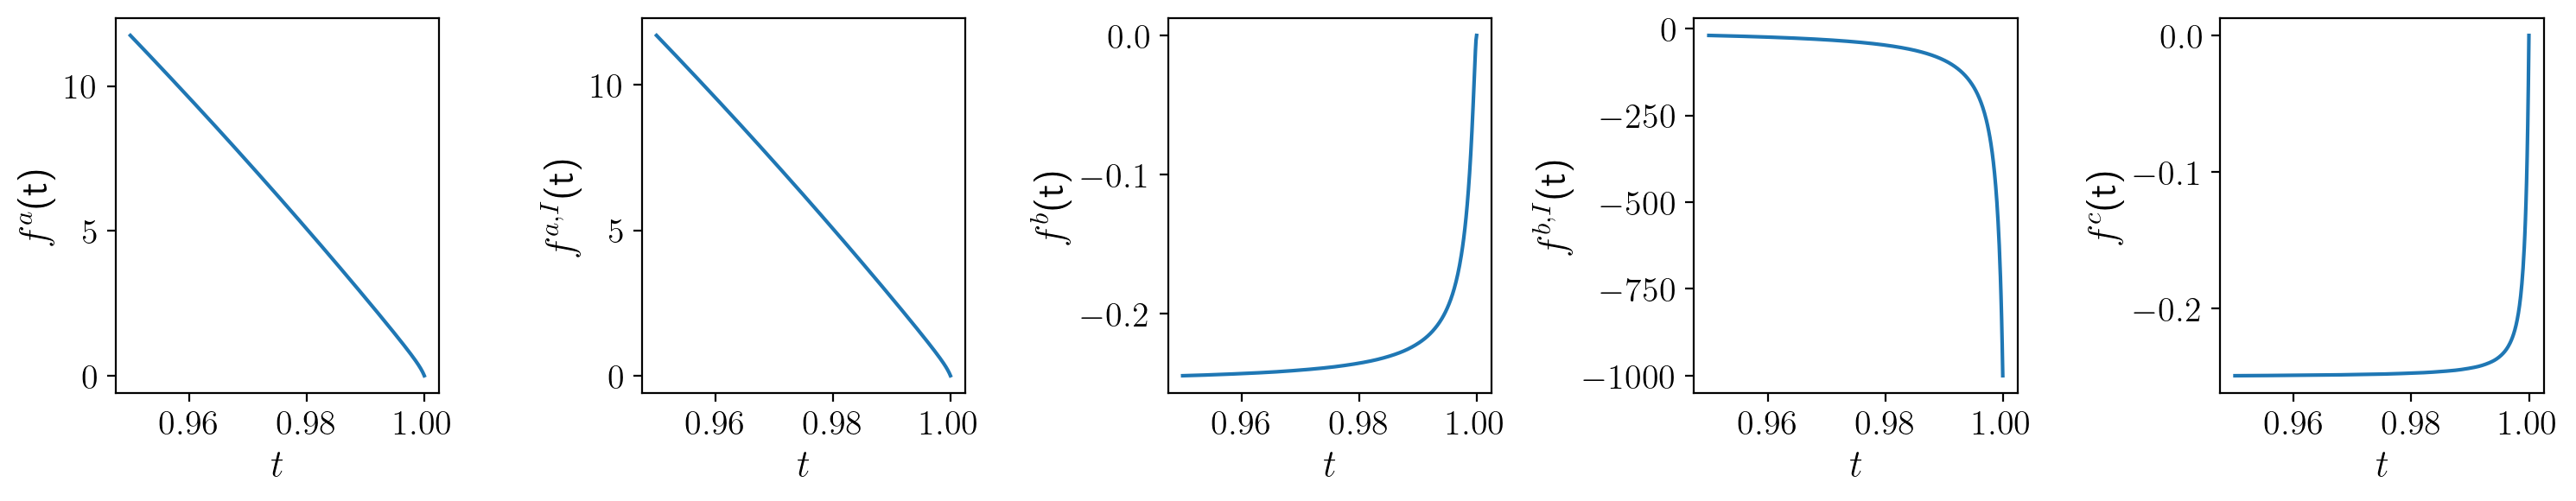

In [11]:
fig, ax = plt.subplots(1,5,figsize=(15,3))
idx = np.argwhere(env.timesteps>=0.95)

ax[0].plot(env.timesteps[idx], env.fa[idx])
ax[1].plot(env.timesteps[idx], env.faI[idx])
ax[2].plot(env.timesteps[idx], env.fb[idx])
ax[3].plot(env.timesteps[idx], env.fbI[idx])
ax[4].plot(env.timesteps[idx], env.fc[idx])


ax[0].set_xlabel(r'$t$', fontsize = 16)
ax[1].set_xlabel(r'$t$', fontsize = 16)
ax[2].set_xlabel(r'$t$', fontsize = 16)
ax[3].set_xlabel(r'$t$', fontsize = 16)
ax[4].set_xlabel(r'$t$', fontsize = 16)

ax[0].set_ylabel(r'${f}^{a}$(t)', fontsize = 16)
ax[1].set_ylabel(r'${f}^{a,I}$(t)', fontsize = 16)
ax[2].set_ylabel(r'${f}^{b}$(t)', fontsize = 16)
ax[3].set_ylabel(r'${f}^{b,I}$(t)', fontsize = 16)
ax[4].set_ylabel(r'${f}^{c}$(t)', fontsize = 16)

resolution_value = 100
plt.tight_layout()

plt.savefig('figures/time_dep_coefficients_inf_I.pdf', format="pdf", dpi=resolution_value)
plt.show()

In [12]:
np.random.seed(101)

In [13]:
alpha, alpha_i, St, (X_I, Q_I, nu_I, MtM_I), (X_iI, Q_iI, nu_iI, MtM_iI) , (X_B, Q_B, nu_B, MtM_B) , (X_U, Q_U, nu_U, MtM_U) = env.run_simulation_everybody_and_ind_informed(nsims = 10_000)

100%|███████████████████████████████████| 10000/10000 [00:06<00:00, 1583.51it/s]


In [14]:
speed_alpha = env.fa.reshape(-1,1) * alpha
qtl_speed_alpha = np.quantile(speed_alpha,[0.05,0.95], axis=1)

speed_alphai = env.faI.reshape(-1,1) * alpha_i
qtl_speed_alphai = np.quantile(speed_alphai,[0.05,0.95], axis=1)

qtl_alpha = np.quantile(alpha,[0.05,0.95], axis=1)
qtl_alpha_i = np.quantile(alpha_i,[0.05,0.95], axis=1)
qtl_St = np.quantile(St,[0.05,0.95], axis=1)

qtl_nu_I = np.quantile(nu_I,[0.05,0.95], axis=1)
qtl_nu_iI = np.quantile(nu_iI,[0.05,0.95], axis=1)
qtl_nu_B = np.quantile(nu_B,[0.05,0.95], axis=1)
qtl_Q_I = np.quantile(Q_I,[0.05,0.95], axis=1)
qtl_Q_iI = np.quantile(Q_iI,[0.05,0.95], axis=1)
qtl_Q_B = np.quantile(Q_B,[0.05,0.95], axis=1)

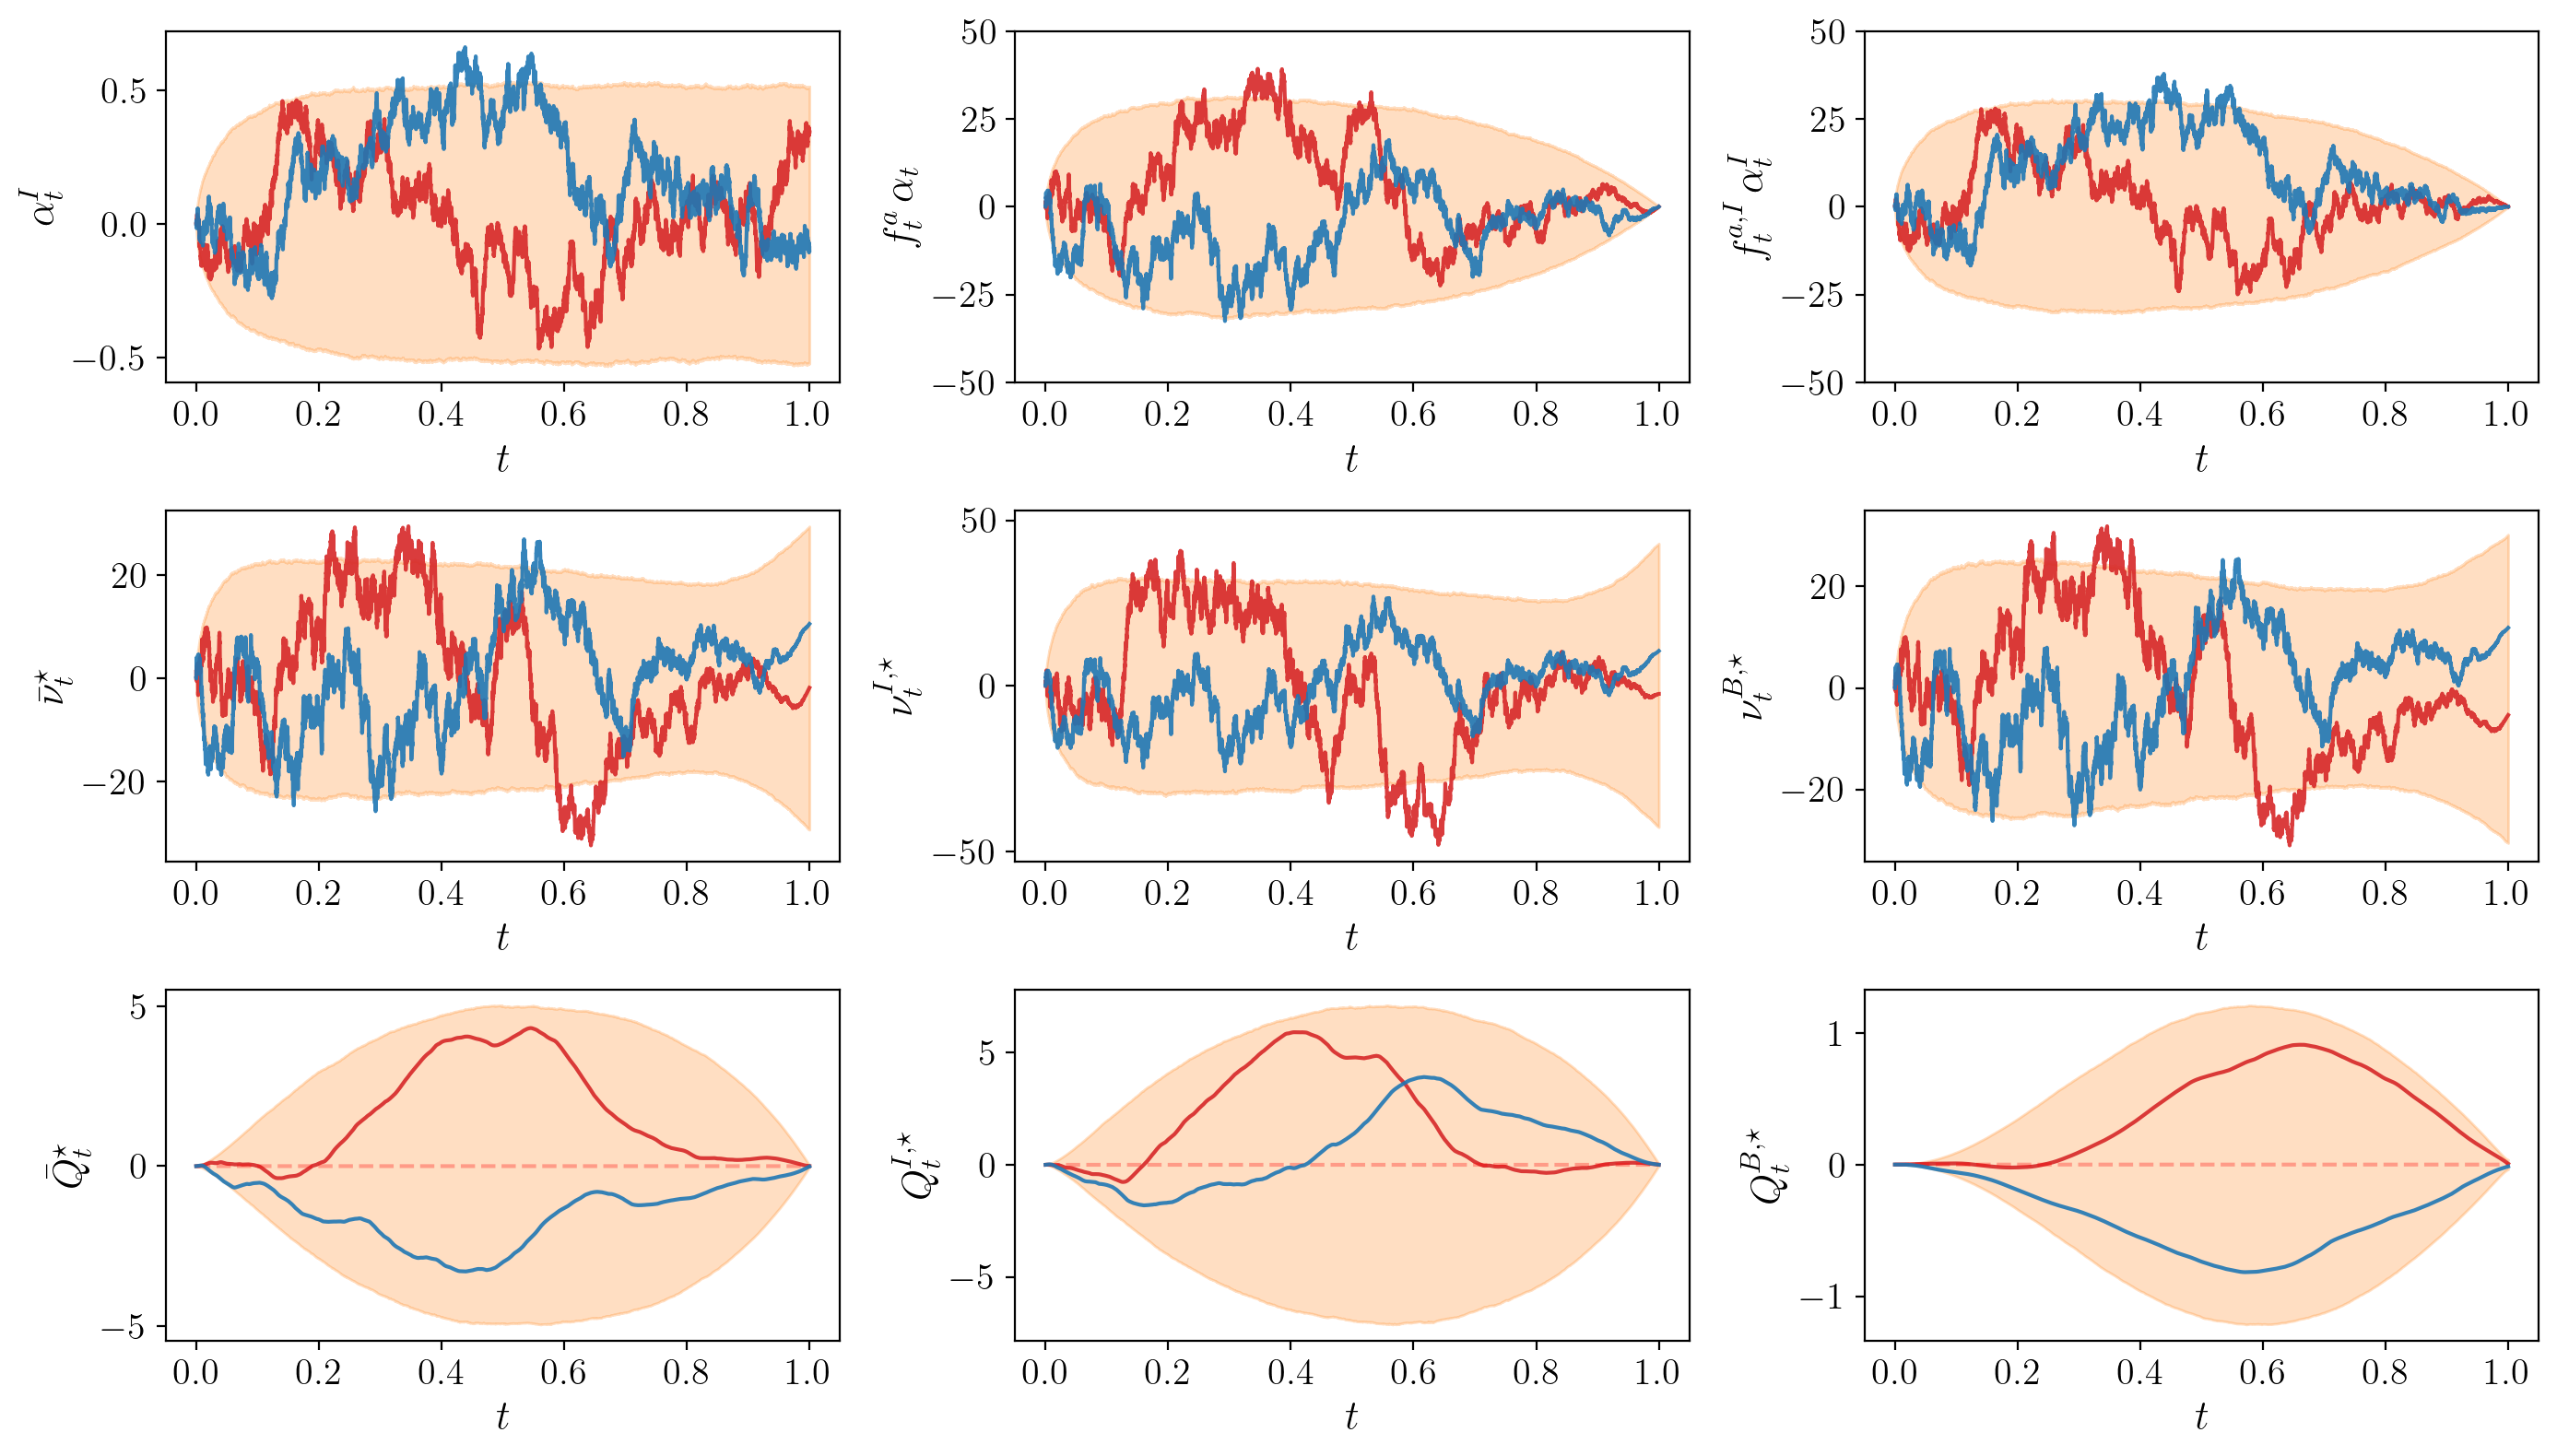

In [15]:
fig, ax = plt.subplots(3,3,figsize=(14,8))
idx = np.argwhere(env.timesteps<=1)

sim = [5]

ax[0,0].plot(env.timesteps[idx], alpha_i[idx,sim],  'tab:red', alpha = 0.9)
ax[0,0].fill_between(env.timesteps[idx].reshape(-1,),qtl_alpha_i[0],qtl_alpha_i[-1],alpha=0.25, color=fill_colour)
#ax[0,0].plot(env.timesteps[idx], alpha[idx,sim],  'tab:red', alpha = 0.9)
#ax[0,0].fill_between(env.timesteps[idx].reshape(-1,),qtl_alpha[0],qtl_alpha[-1],alpha=0.25, color=fill_colour)

ax[0,1].plot(env.timesteps[idx], speed_alpha[idx,sim],  'tab:red', alpha = 0.9)
ax[0,1].fill_between(env.timesteps[idx].reshape(-1,),qtl_speed_alpha[0],qtl_speed_alpha[-1],alpha=0.25, color=fill_colour)
#ax[0,1].plot(env.timesteps[idx], alpha_i[idx,sim],  'tab:red', alpha = 0.9)
#ax[0,1].fill_between(env.timesteps[idx].reshape(-1,),qtl_alpha_i[0],qtl_alpha_i[-1],alpha=0.25, color=fill_colour)

ax[0,2].plot(env.timesteps[idx], speed_alphai[idx,sim],  'tab:red', alpha = 0.9)
ax[0,2].fill_between(env.timesteps[idx].reshape(-1,),qtl_speed_alphai[0],qtl_speed_alphai[-1],alpha=0.25, color=fill_colour)
#ax[0,2].plot(env.timesteps[idx], St[idx,sim],  'tab:red', alpha = 0.9)
#ax[0,2].fill_between(env.timesteps[idx].reshape(-1,),qtl_St[0],qtl_St[-1],alpha=0.25, color=fill_colour)

ax[1,0].plot(env.timesteps[idx], nu_I[idx,sim],'tab:red', alpha = 0.9)
ax[1,0].fill_between(env.timesteps[idx].reshape(-1,),qtl_nu_I[0],qtl_nu_I[-1],alpha=0.25, color=fill_colour)

ax[1,1].plot(env.timesteps[idx], nu_iI[idx,sim],'tab:red', alpha = 0.9)
ax[1,1].fill_between(env.timesteps[idx].reshape(-1,),qtl_nu_iI[0],qtl_nu_iI[-1],alpha=0.25, color=fill_colour)

ax[1,2].plot(env.timesteps[idx], nu_B[idx,sim],'tab:red', alpha = 0.9)
ax[1,2].fill_between(env.timesteps[idx].reshape(-1,),qtl_nu_B[0],qtl_nu_B[-1],alpha=0.25, color=fill_colour)

ax[2,0].plot(env.timesteps[idx], Q_I[idx,sim],  'tab:red',  alpha = 0.9)
ax[2,0].fill_between(env.timesteps[idx].reshape(-1,),qtl_Q_I[0],qtl_Q_I[-1],alpha=0.25, color=fill_colour)

ax[2,1].plot(env.timesteps[idx], Q_iI[idx,sim],  'tab:red',  alpha = 0.9)
ax[2,1].fill_between(env.timesteps[idx].reshape(-1,),qtl_Q_iI[0],qtl_Q_iI[-1],alpha=0.25, color=fill_colour)

ax[2,2].plot(env.timesteps[idx], Q_B[idx,sim],  'tab:red',  alpha = 0.9)
ax[2,2].fill_between(env.timesteps[idx].reshape(-1,),qtl_Q_B[0],qtl_Q_B[-1],alpha=0.25, color=fill_colour)

ax[2,0].plot(env.timesteps[idx], 0*Q_I[idx,sim], 'r--', alpha = 0.3)
ax[2,1].plot(env.timesteps[idx], 0*Q_B[idx,sim], 'r--', alpha = 0.3)
ax[2,2].plot(env.timesteps[idx], 0*Q_B[idx,sim], 'r--', alpha = 0.3)

sim = [4]

ax[0,0].plot(env.timesteps[idx], alpha_i[idx,sim],  'tab:blue', alpha = 0.9)
ax[0,1].plot(env.timesteps[idx], speed_alpha[idx,sim],  'tab:blue', alpha = 0.9)
#ax[0,0].plot(env.timesteps[idx], alpha[idx,sim],  'tab:blue', alpha = 0.9)
#ax[0,1].plot(env.timesteps[idx], alpha_i[idx,sim],  'tab:blue', alpha = 0.9)
#ax[0,2].plot(env.timesteps[idx], St[idx,sim],  'tab:blue', alpha = 0.9)
ax[0,2].plot(env.timesteps[idx], speed_alphai[idx,sim],  'tab:blue', alpha = 0.9)

ax[1,0].plot(env.timesteps[idx], nu_I[idx,sim],'tab:blue', alpha = 0.9)
ax[1,1].plot(env.timesteps[idx], nu_I[idx,sim],'tab:blue', alpha = 0.9)
ax[1,2].plot(env.timesteps[idx], nu_B[idx,sim],'tab:blue', alpha = 0.9)

ax[2,0].plot(env.timesteps[idx], Q_I[idx,sim],  'tab:blue',  alpha = 0.9)
ax[2,1].plot(env.timesteps[idx], Q_iI[idx,sim],  'tab:blue',  alpha = 0.9)
ax[2,2].plot(env.timesteps[idx], Q_B[idx,sim],  'tab:blue',  alpha = 0.9)



ax[0,0].set_xlabel(r'$t$', fontsize = 16)
ax[0,1].set_xlabel(r'$t$', fontsize = 16)
ax[0,2].set_xlabel(r'$t$', fontsize = 16)
ax[1,0].set_xlabel(r'$t$', fontsize = 16)
ax[1,1].set_xlabel(r'$t$', fontsize = 16)
ax[1,2].set_xlabel(r'$t$', fontsize = 16)
ax[2,0].set_xlabel(r'$t$', fontsize = 16)
ax[2,1].set_xlabel(r'$t$', fontsize = 16)
ax[2,2].set_xlabel(r'$t$', fontsize = 16)

#ax[0,0].set_ylabel(r'$\alpha_t$', fontsize = 16)
ax[0,0].set_ylabel(r'$\alpha^I_t$', fontsize = 16)
#ax[0,1].set_ylabel(r'$\alpha^I_t$', fontsize = 16)
ax[0,1].set_ylabel(r'$f^{a}_t\,\alpha_t$', fontsize = 16)
ax[0,2].set_ylabel(r'$f^{a,I}_t\,\alpha^I_t$', fontsize = 16)
ax[1,0].set_ylabel(r'$\bar{\nu}^{\star}_t$', fontsize = 16)
ax[1,1].set_ylabel(r'${\nu}^{I,\star}_t$', fontsize = 16)
ax[1,2].set_ylabel(r'$\nu^{B,\star}_t$', fontsize = 16)
ax[2,0].set_ylabel(r'$\bar{Q}^{\star}_t$', fontsize = 16)
ax[2,1].set_ylabel(r'${Q}^{I,\star}_t$', fontsize = 16)
ax[2,2].set_ylabel(r'${Q}^{B,\star}_t$', fontsize = 16)

# Custom
ax[0,1].set_ylim([-50,50])
ax[0,2].set_ylim([-50,50])

ax[1,1].set_ylim([-53,53])
#ax[0,2].set_ylim([-41,41])
#ax[2,0].set_ylim([-2.,2.6])
#ax[2,1].set_ylim([-2.,2.6])

resolution_value = 100
plt.tight_layout()

plt.savefig('figures/two_sample_paths_main_processes_MFG_ind_iT.pdf', format="pdf", dpi=resolution_value)
plt.show()

# Externalisation

In [16]:
def auxF(x, tol=1e-10):
    return np.maximum(x,tol)*(x>=0) + np.minimum(x,-tol)*(x<0)

In [17]:
eps = 1e-1
#ratio_IB = (eps + np.abs(nu_I[1:]))/(eps + np.abs(nu_B[1:])) #np.exp(nu_I)/(np.exp(nu_B) + np.exp(nu_I) )
ratio_IB = auxF(nu_I[1:])/auxF(nu_B[1:]) #np.exp(nu_I)/(np.exp(nu_B) + np.exp(nu_I) )
#ratio_iI = (eps + np.abs(nu_I[1:]))/(eps + np.abs(nu_iI[1:]))#np.exp(nu_iI)/(np.exp(nu_iI) + np.exp(nu_I) )

qtl_IB = np.quantile(ratio_IB,[0.05,0.95], axis=1)
#qtl_iI = np.quantile(ratio_iI,[0.05,0.95], axis=1)

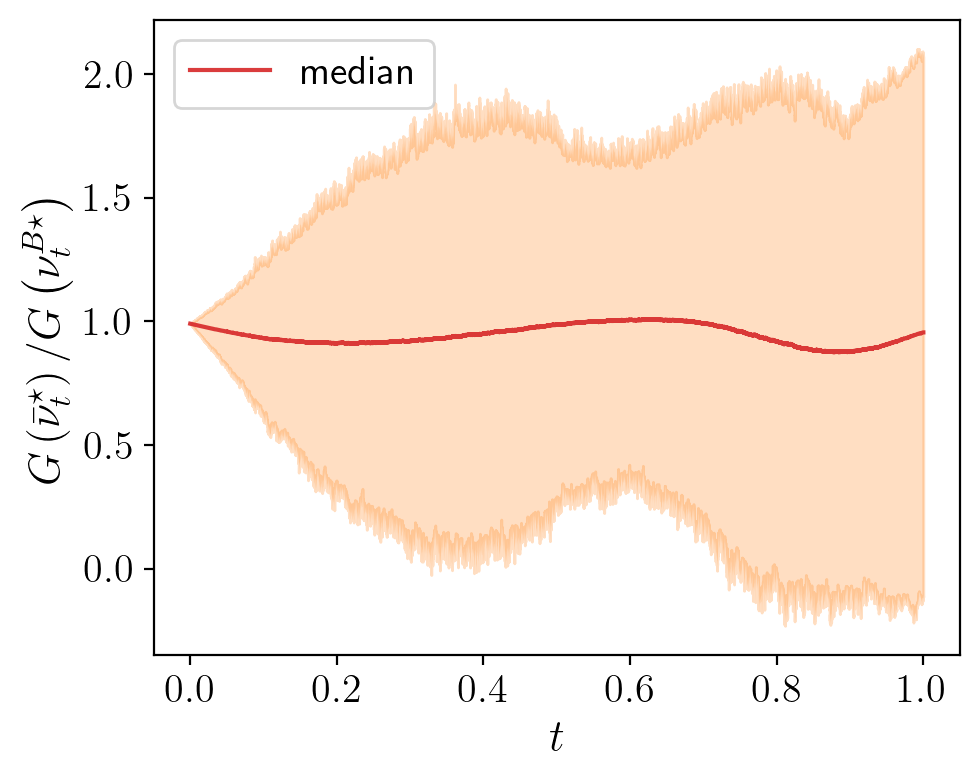

In [18]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
idx = np.argwhere(env.timesteps<=1)
idx = idx[1:]
ax.plot(env.timesteps[idx], np.median(ratio_IB,axis=1),  'tab:red', alpha = 0.9, label = 'median')
ax.fill_between(env.timesteps[idx].reshape(-1,),qtl_IB[0],qtl_IB[-1],alpha=0.25, color=fill_colour)
ax.legend(loc = 'upper left')
ax.set_ylabel(r'$G\left(\bar{\nu}^{\star}_t\right) / G\left(\nu^{B\star}_t\right)$', fontsize = 16)
ax.set_xlabel(r'$t$', fontsize = 16)
resolution_value = 100
plt.tight_layout()

plt.savefig('figures/externalisation_plot.pdf', format="pdf", dpi=resolution_value)
plt.show()

# Herd behaviour

In [19]:
params["b"] = 5e-3
env = utils.MFG_broker_vs_informed(**params)

In [20]:
np.random.seed(101)
alpha, alpha_i, St, (X_I, Q_I, nu_I, MtM_I), (X_iI, Q_iI, nu_iI, MtM_iI) , (X_B, Q_B, nu_B, MtM_B) , (X_U, Q_U, nu_U, MtM_U) = env.run_simulation_everybody_and_ind_informed(nsims = 10000)

100%|███████████████████████████████████| 10000/10000 [00:06<00:00, 1499.99it/s]


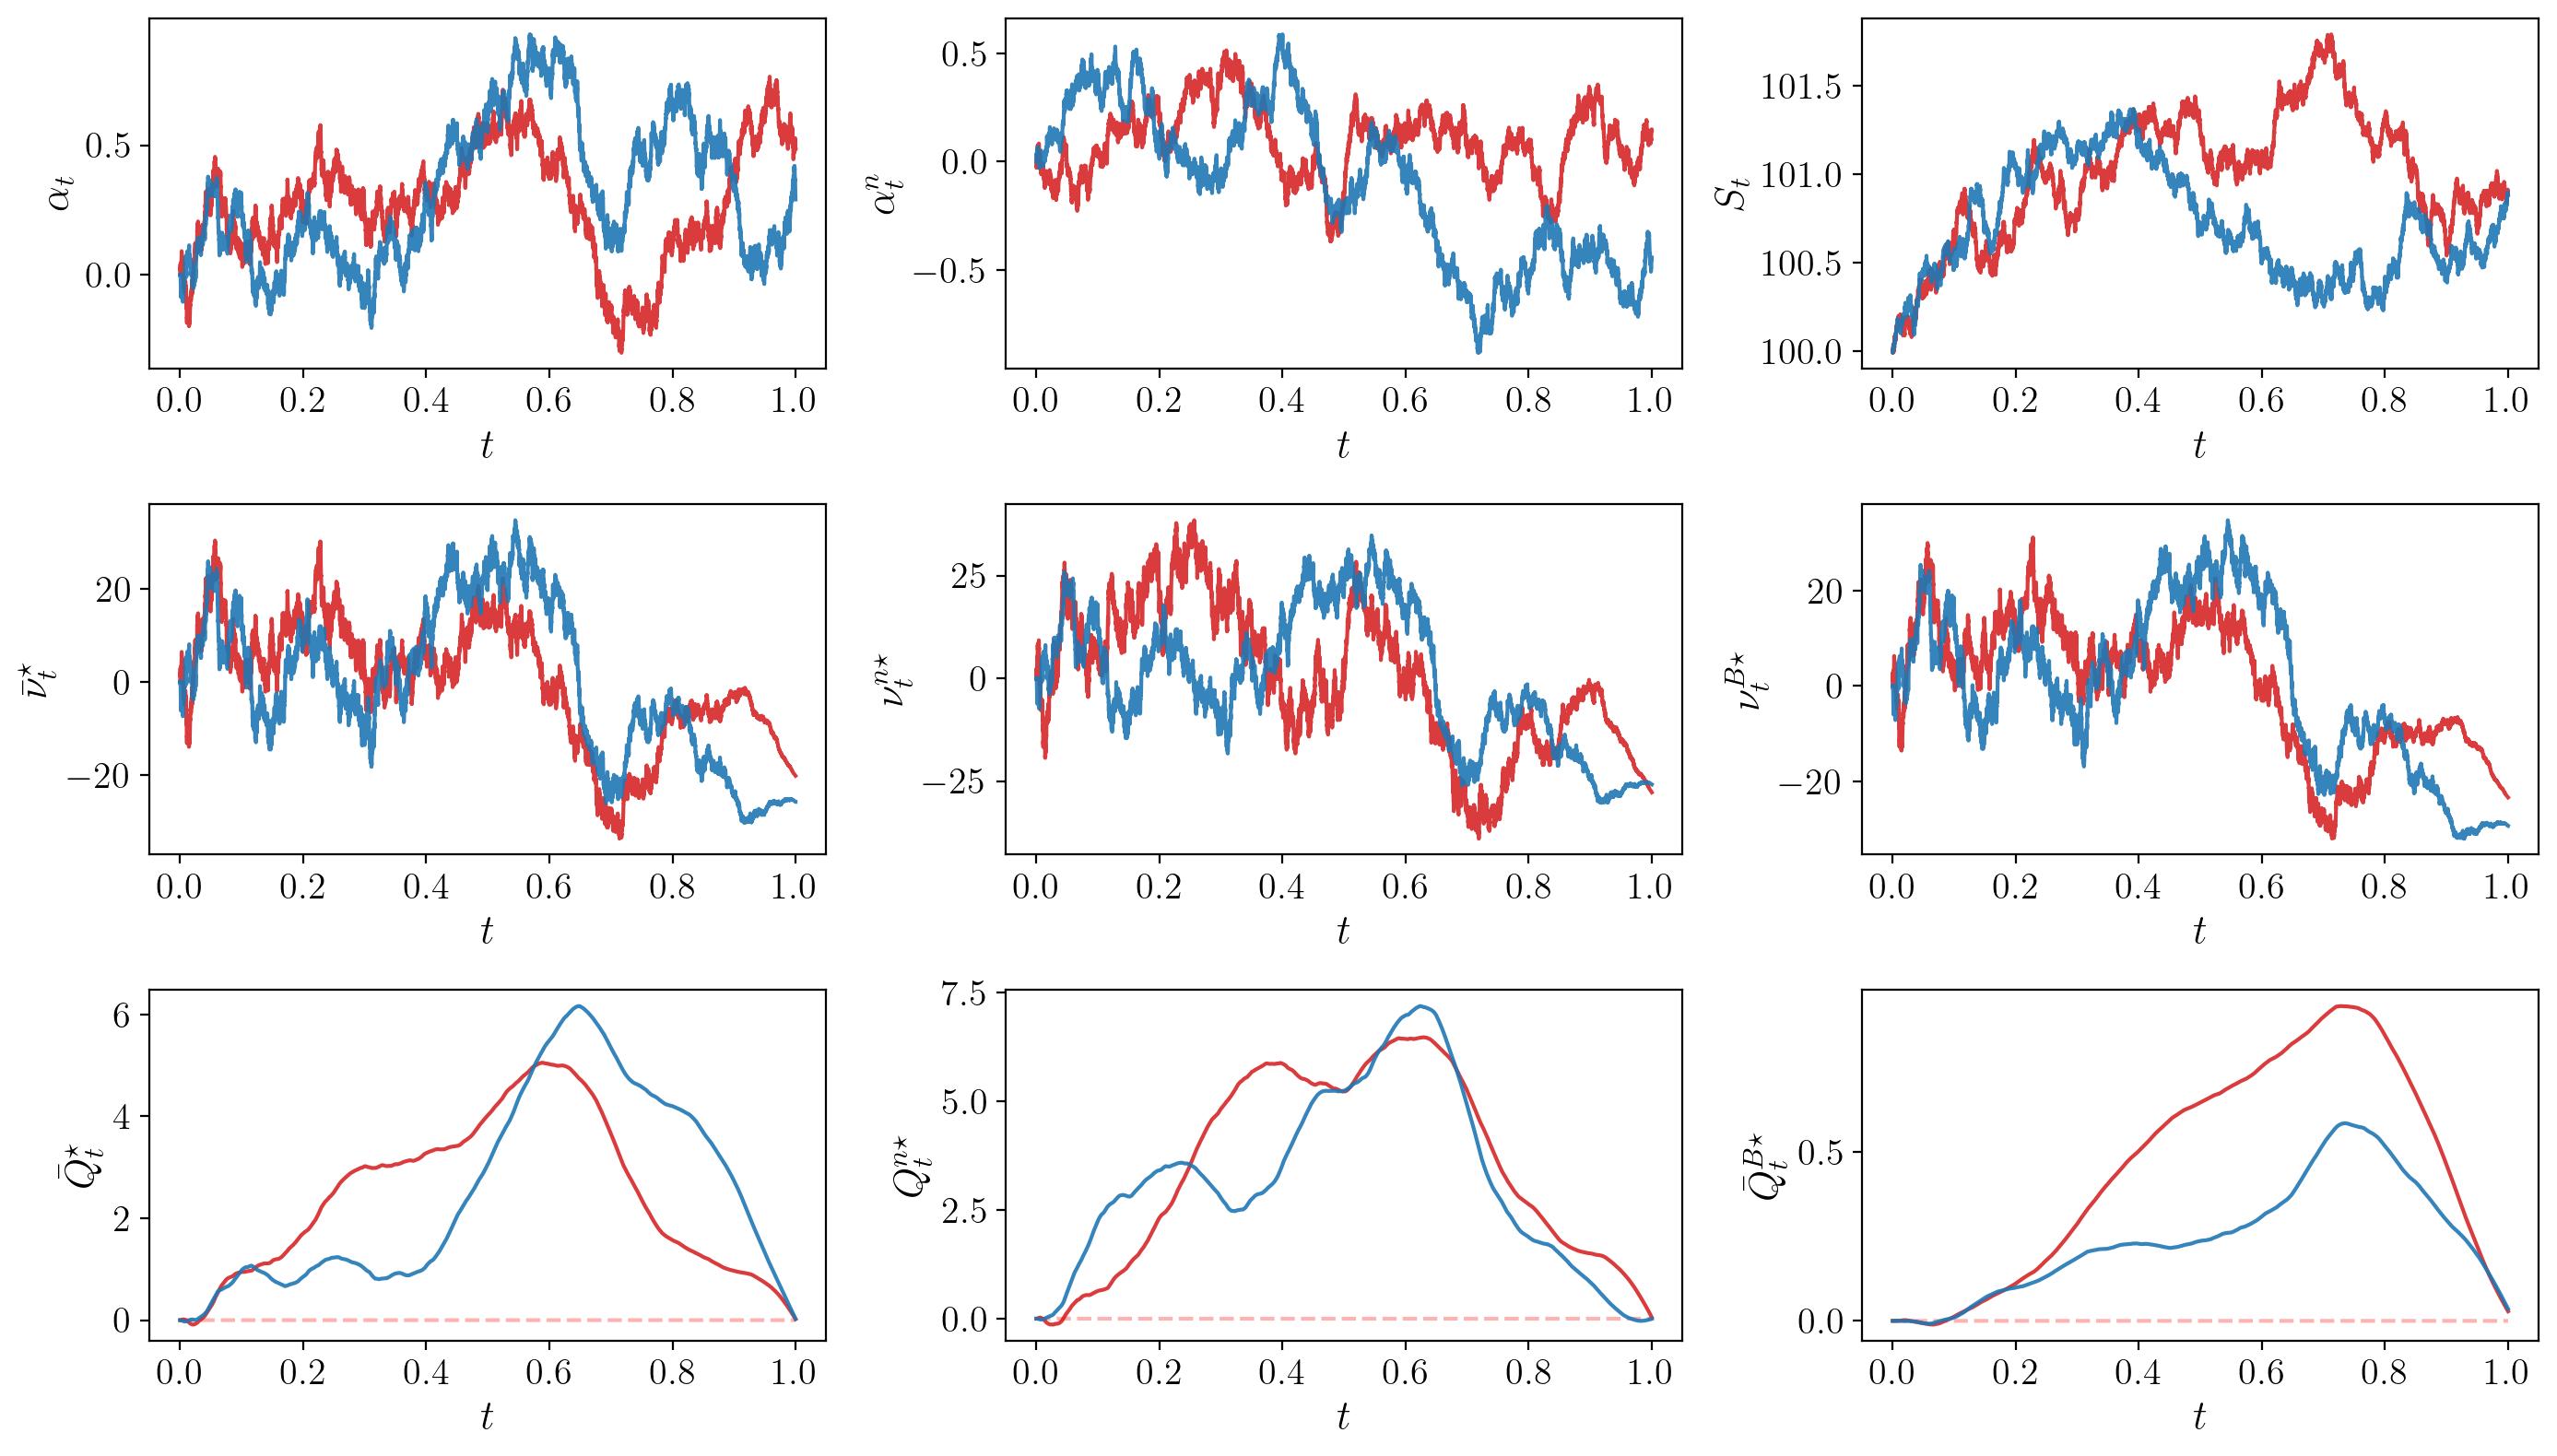

In [21]:
fig, ax = plt.subplots(3,3,figsize=(14,8))
idx = np.argwhere(env.timesteps<=1)

sim = [0]

ax[0,0].plot(env.timesteps[idx], alpha[idx,sim],  'tab:red', alpha = 0.9)
ax[0,1].plot(env.timesteps[idx], alpha_i[idx,sim],  'tab:red', alpha = 0.9)
ax[0,2].plot(env.timesteps[idx], St[idx,sim],  'tab:red', alpha = 0.9)

ax[1,0].plot(env.timesteps[idx], nu_I[idx,sim],'tab:red', alpha = 0.9)
ax[1,1].plot(env.timesteps[idx], nu_iI[idx,sim],'tab:red', alpha = 0.9)
ax[1,2].plot(env.timesteps[idx], nu_B[idx,sim],'tab:red', alpha = 0.9)

ax[2,0].plot(env.timesteps[idx], Q_I[idx,sim],  'tab:red',  alpha = 0.9)
ax[2,1].plot(env.timesteps[idx], Q_iI[idx,sim],  'tab:red',  alpha = 0.9)
ax[2,2].plot(env.timesteps[idx], Q_B[idx,sim],  'tab:red',  alpha = 0.9)

ax[2,0].plot(env.timesteps[idx], 0*Q_I[idx,sim], 'r--', alpha = 0.3)
ax[2,1].plot(env.timesteps[idx], 0*Q_B[idx,sim], 'r--', alpha = 0.3)
ax[2,2].plot(env.timesteps[idx], 0*Q_B[idx,sim], 'r--', alpha = 0.3)

sim = [2]

ax[0,0].plot(env.timesteps[idx], alpha[idx,sim],  'tab:blue', alpha = 0.9)
ax[0,1].plot(env.timesteps[idx], alpha_i[idx,sim],  'tab:blue', alpha = 0.9)
ax[0,2].plot(env.timesteps[idx], St[idx,sim],  'tab:blue', alpha = 0.9)

ax[1,0].plot(env.timesteps[idx], nu_I[idx,sim],'tab:blue', alpha = 0.9)
ax[1,1].plot(env.timesteps[idx], nu_I[idx,sim],'tab:blue', alpha = 0.9)
ax[1,2].plot(env.timesteps[idx], nu_B[idx,sim],'tab:blue', alpha = 0.9)

ax[2,0].plot(env.timesteps[idx], Q_I[idx,sim],  'tab:blue',  alpha = 0.9)
ax[2,1].plot(env.timesteps[idx], Q_iI[idx,sim],  'tab:blue',  alpha = 0.9)
ax[2,2].plot(env.timesteps[idx], Q_B[idx,sim],  'tab:blue',  alpha = 0.9)



ax[0,0].set_xlabel(r'$t$', fontsize = 16)
ax[0,1].set_xlabel(r'$t$', fontsize = 16)
ax[0,2].set_xlabel(r'$t$', fontsize = 16)
ax[1,0].set_xlabel(r'$t$', fontsize = 16)
ax[1,1].set_xlabel(r'$t$', fontsize = 16)
ax[1,2].set_xlabel(r'$t$', fontsize = 16)
ax[2,0].set_xlabel(r'$t$', fontsize = 16)
ax[2,1].set_xlabel(r'$t$', fontsize = 16)
ax[2,2].set_xlabel(r'$t$', fontsize = 16)

ax[0,0].set_ylabel(r'$\alpha_t$', fontsize = 16)
ax[0,1].set_ylabel(r'$\alpha^n_t$', fontsize = 16)
ax[0,2].set_ylabel(r'$S_t$', fontsize = 16)
ax[1,0].set_ylabel(r'$\bar{\nu}^{\star}_t$', fontsize = 16)
ax[1,1].set_ylabel(r'${\nu}^{n\star}_t$', fontsize = 16)
ax[1,2].set_ylabel(r'$\nu^{B\star}_t$', fontsize = 16)
ax[2,0].set_ylabel(r'$\bar{Q}^{\star}_t$', fontsize = 16)
ax[2,1].set_ylabel(r'${Q}^{n\star}_t$', fontsize = 16)
ax[2,2].set_ylabel(r'$\bar{Q}^{B\star}_t$', fontsize = 16)

# Custom
#ax[1,0].set_ylim([-30,35])
#ax[1,1].set_ylim([-30,35])
#ax[2,0].set_ylim([-2.,2.6])
#ax[2,1].set_ylim([-2.,2.6])

resolution_value = 100
plt.tight_layout()

plt.savefig('figures/two_sample_paths_main_processes_MFG_ind_iT_large_b.pdf', format="pdf", dpi=resolution_value)
plt.show()

# Stressing model parameters

In [22]:
params = {'alpha0': 0, 'k_alpha': 5., 'sigma_alpha': 1., # common signal
              'S0': 100., 'sigma_s': 1.,
              'Q0I' : 0., 'etaI' : 1.0e-3, 'aI' : 1.0, 'phiI' : 1e-2,
              'Q0B' : 0., 'etaB' : 1.2e-3, 'aB' : 1.0, 'b' : 1e-3, 'phiB': 1e-2,
              'alphaI0': 0, 'kI' : 5., 'sigmaI' : 0.5, # individual signal 
              'T': 1., 'Nt': 10_000}

In [23]:
baseline_label = 'baseline'
baseline_width = 2.
to_stress_variables = ['k_alpha', 'b', 'etaI', 'etaB']
latex_stress_variable = [r'$k_\alpha$',  r'$b$', r'$\eta^I$', r'$\eta^B$']
variable_colors = ['tab:olive', 'tab:green', 'tab:red', 'tab:blue']
to_stress_factors = [0.5,2.]

0.5\,$k_\alpha$
2.0\,$k_\alpha$
0.5\,$b$
2.0\,$b$
0.5\,$\eta^I$
2.0\,$\eta^I$
0.5\,$\eta^B$
2.0\,$\eta^B$


/var/folders/4m/wddbp9t11250z6q39gj69l3w0000gq/T/ipykernel_79281/2867442808.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.8, 1])  # Adjust layout to make space for the legend


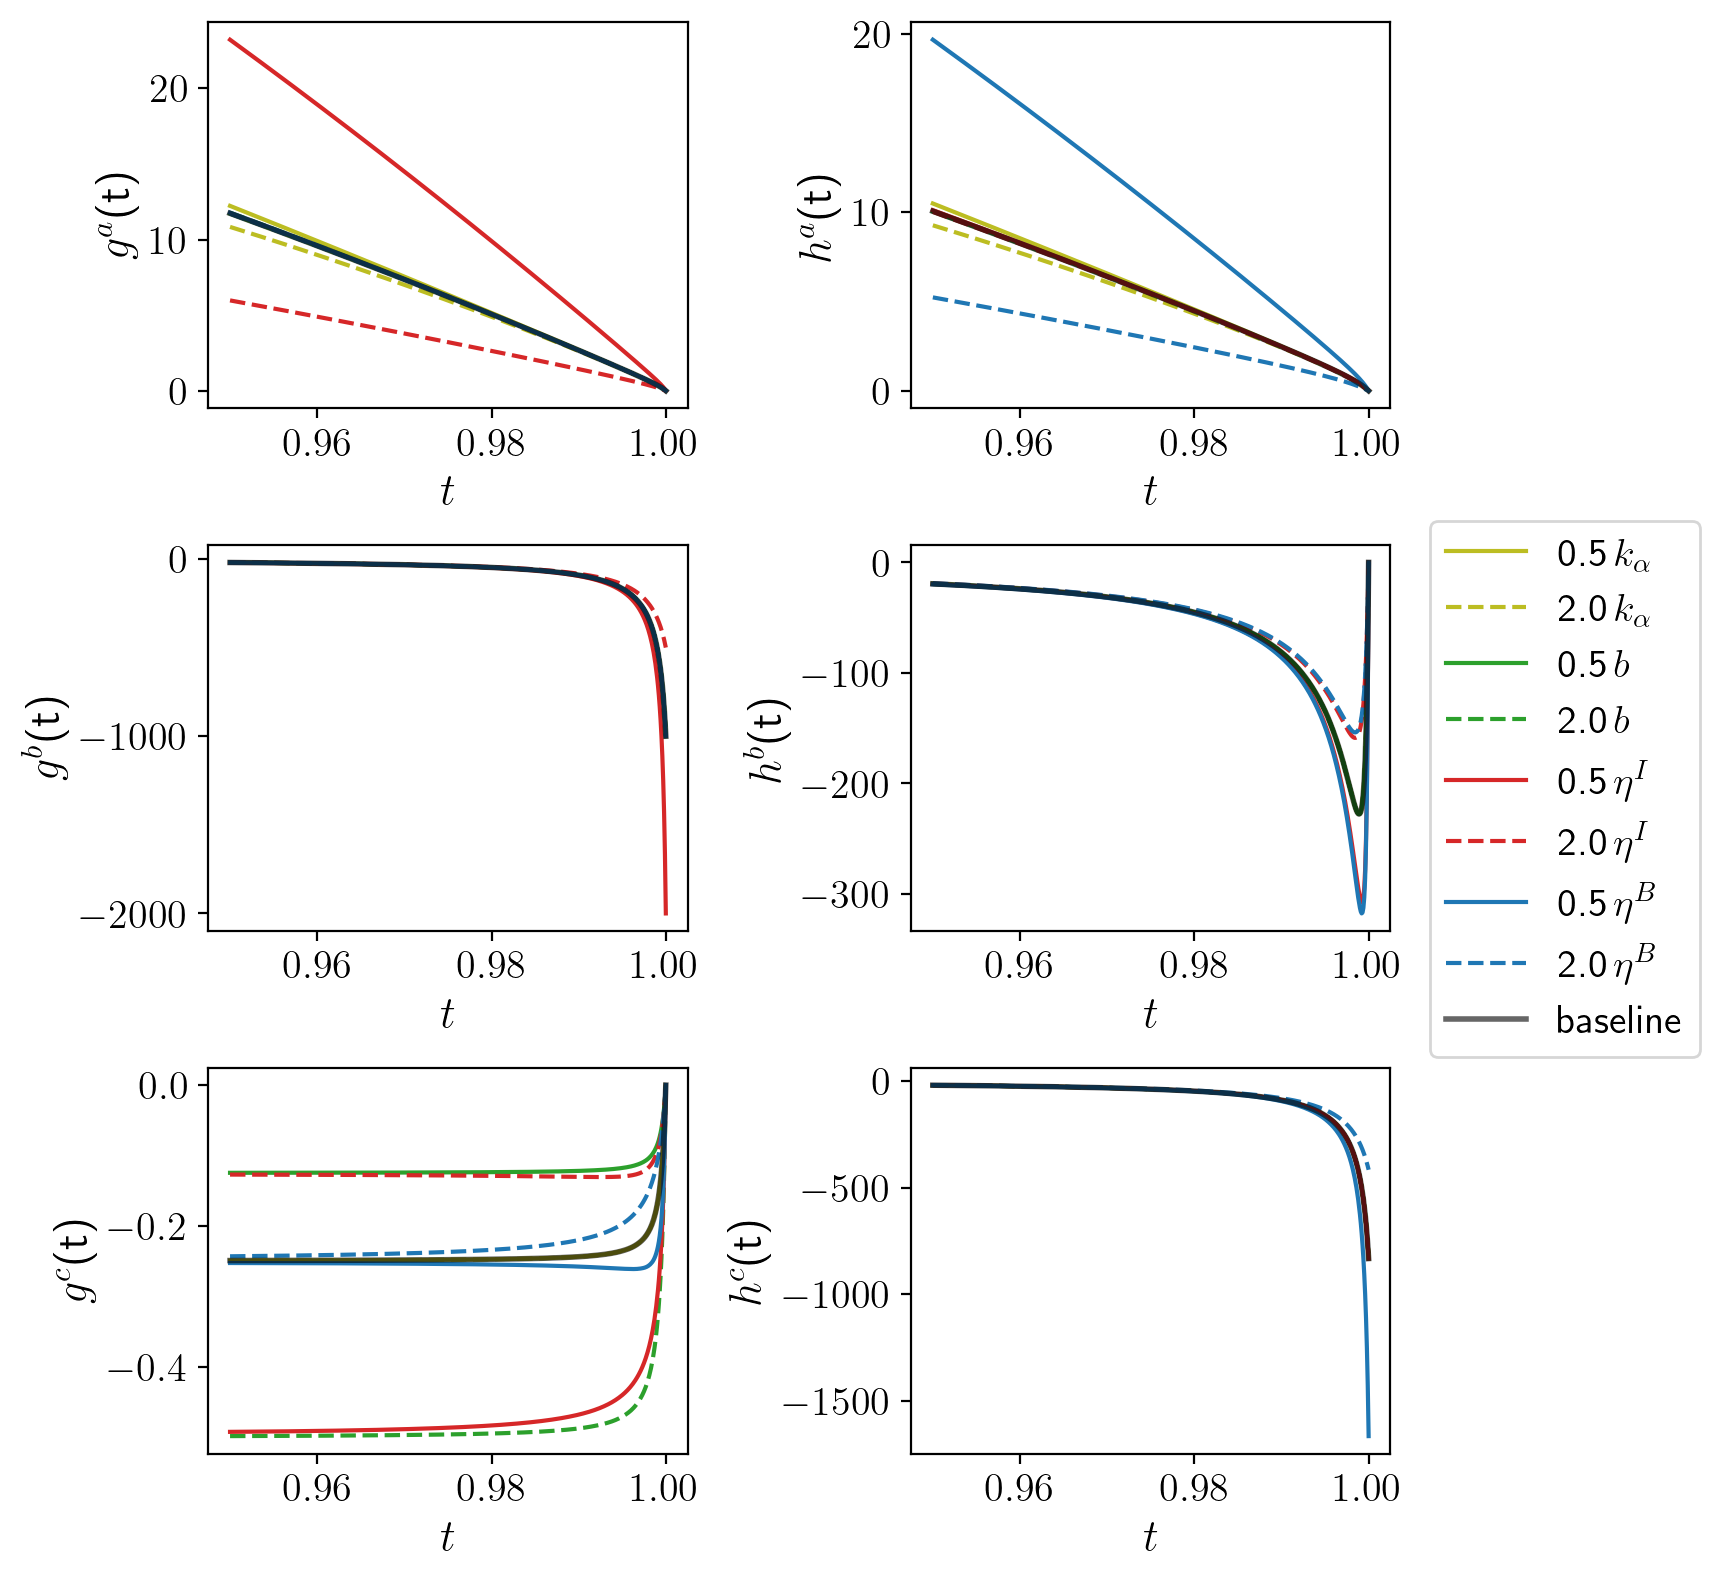

In [24]:
fig, ax = plt.subplots(3, 2, figsize=(9, 8))
idx = np.argwhere(env.timesteps >= 0.95)


for iv, stressed_variable in enumerate(to_stress_variables):
    for i, factor in enumerate(to_stress_factors):
        params_stressed = params.copy()
        params_stressed[stressed_variable] = factor * params_stressed[stressed_variable]
        env_stressing = utils.MFG_broker_vs_informed(**params_stressed)
        
        string_label = str(factor) + r'\,' + latex_stress_variable[iv]
        print(string_label)
        
        if i==0:
            ax[0, 0].plot(env.timesteps[idx], env_stressing.ga[idx], label=string_label, color=variable_colors[iv])
            ax[0, 1].plot(env.timesteps[idx], env_stressing.ha[idx], label=string_label, color=variable_colors[iv])
            ax[1, 0].plot(env.timesteps[idx], env_stressing.gb[idx], label=string_label, color=variable_colors[iv])
            ax[1, 1].plot(env.timesteps[idx], env_stressing.hb[idx], label=string_label, color=variable_colors[iv])
            ax[2, 0].plot(env.timesteps[idx], env_stressing.gc[idx], label=string_label, color=variable_colors[iv])
            ax[2, 1].plot(env.timesteps[idx], env_stressing.hc[idx], label=string_label, color=variable_colors[iv])
        else:
            ax[0, 0].plot(env.timesteps[idx], env_stressing.ga[idx], label=string_label, color=variable_colors[iv], linestyle = '--')
            ax[0, 1].plot(env.timesteps[idx], env_stressing.ha[idx], label=string_label, color=variable_colors[iv], linestyle = '--')
            ax[1, 0].plot(env.timesteps[idx], env_stressing.gb[idx], label=string_label, color=variable_colors[iv], linestyle = '--')
            ax[1, 1].plot(env.timesteps[idx], env_stressing.hb[idx], label=string_label, color=variable_colors[iv], linestyle = '--')
            ax[2, 0].plot(env.timesteps[idx], env_stressing.gc[idx], label=string_label, color=variable_colors[iv], linestyle = '--')
            ax[2, 1].plot(env.timesteps[idx], env_stressing.hc[idx], label=string_label, color=variable_colors[iv], linestyle = '--')

env_stressing = utils.MFG_broker_vs_informed(**params)
ax[0, 0].plot(env.timesteps[idx], env_stressing.ga[idx], color = 'black', linewidth =baseline_width, label = baseline_label, alpha= 0.6)
ax[0, 1].plot(env.timesteps[idx], env_stressing.ha[idx], color = 'black', linewidth =baseline_width, label = baseline_label, alpha= 0.6)
ax[1, 0].plot(env.timesteps[idx], env_stressing.gb[idx], color = 'black', linewidth =baseline_width, label = baseline_label, alpha= 0.6)
ax[1, 1].plot(env.timesteps[idx], env_stressing.hb[idx], color = 'black', linewidth =baseline_width, label = baseline_label, alpha= 0.6)
ax[2, 0].plot(env.timesteps[idx], env_stressing.gc[idx], color = 'black', linewidth =baseline_width, label = baseline_label, alpha= 0.6)
ax[2, 1].plot(env.timesteps[idx], env_stressing.hc[idx], color = 'black', linewidth =baseline_width, label = baseline_label, alpha= 0.6)

            
# Add an axis on the right side for the legend
fig.subplots_adjust(right=0.8)
legend_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # [left, bottom, width, height]

# Turn off the axis
legend_ax.axis('off')

# Combine legends from all subplots
handles, labels = [], []
for axes in ax.flatten():
    for handle, label in zip(*axes.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

legend_ax.legend(handles, labels, loc='center')

for i in range(3):
    for j in range(2):
        ax[i, j].set_xlabel(r'$t$', fontsize=16)
        
ax[0, 0].set_ylabel(r'${g}^a$(t)', fontsize=16)
ax[0, 1].set_ylabel(r'${h}^a$(t)', fontsize=16)
ax[1, 0].set_ylabel(r'${g}^b$(t)', fontsize=16)
ax[1, 1].set_ylabel(r'${h}^b$(t)', fontsize=16)
ax[2, 0].set_ylabel(r'${g}^c$(t)', fontsize=16)
ax[2, 1].set_ylabel(r'${h}^c$(t)', fontsize=16)

plt.tight_layout(rect=[0, 0, 0.8, 1])  # Adjust layout to make space for the legend
plt.savefig('figures/time_dep_coefficients_stressed.pdf', format="pdf", dpi=resolution_value)
plt.show()

0.5\,$k_\alpha$
2.0\,$k_\alpha$
0.5\,$b$
2.0\,$b$
0.5\,$\eta^I$
2.0\,$\eta^I$
0.5\,$\eta^B$
2.0\,$\eta^B$


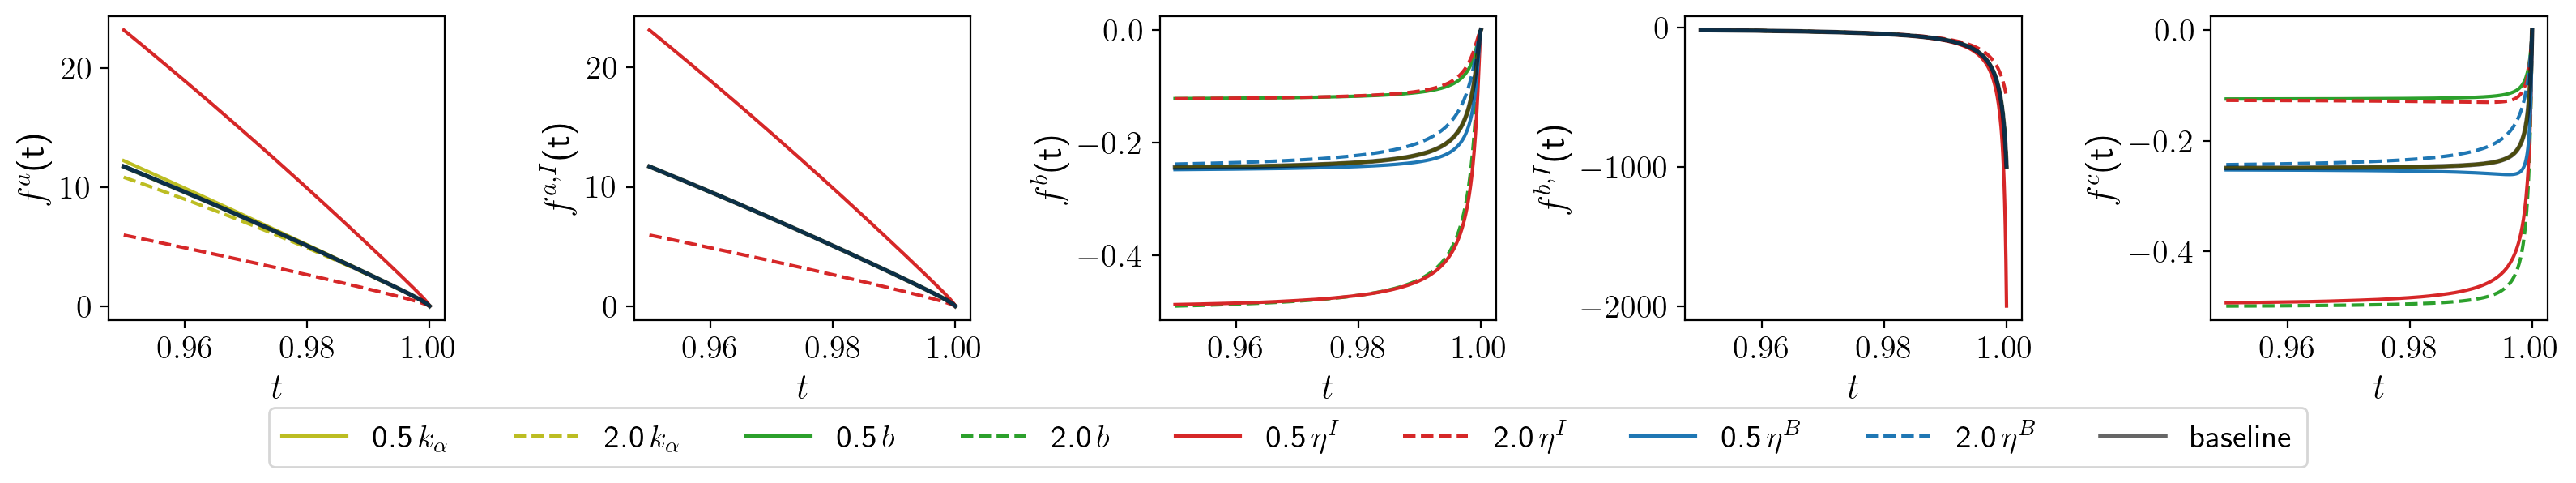

In [25]:
fig, ax = plt.subplots(1, 5, figsize=(16, 3))
idx = np.argwhere(env.timesteps >= 0.95)

for iv, stressed_variable in enumerate(to_stress_variables):
    for i, factor in enumerate(to_stress_factors):
        params_stressed = params.copy()
        params_stressed[stressed_variable] = factor * params_stressed[stressed_variable]
        env_stressing = utils.MFG_broker_vs_informed(**params_stressed)
        
        string_label = str(factor) + r'\,' + latex_stress_variable[iv]
        print(string_label)
        
        linestyle = '-' if i == 0 else '--'
        ax[0].plot(env_stressing.timesteps[idx], env_stressing.fa[idx], label=string_label, color=variable_colors[iv], linestyle=linestyle)
        ax[1].plot(env_stressing.timesteps[idx], env_stressing.faI[idx], label=string_label, color=variable_colors[iv], linestyle=linestyle)
        ax[2].plot(env_stressing.timesteps[idx], env_stressing.fb[idx], label=string_label, color=variable_colors[iv], linestyle=linestyle)
        ax[3].plot(env_stressing.timesteps[idx], env_stressing.fbI[idx], label=string_label, color=variable_colors[iv], linestyle=linestyle)
        ax[4].plot(env_stressing.timesteps[idx], env_stressing.fc[idx], label=string_label, color=variable_colors[iv], linestyle=linestyle)

env_stressing = utils.MFG_broker_vs_informed(**params)

ax[0].plot(env_stressing.timesteps[idx], env_stressing.fa[idx], color='black', linewidth=baseline_width, label=baseline_label, alpha=0.6)
ax[1].plot(env_stressing.timesteps[idx], env_stressing.faI[idx], color='black', linewidth=baseline_width, label=baseline_label, alpha=0.6)
ax[2].plot(env_stressing.timesteps[idx], env_stressing.fb[idx], color='black', linewidth=baseline_width, label=baseline_label, alpha=0.6)
ax[3].plot(env_stressing.timesteps[idx], env_stressing.fbI[idx], color='black', linewidth=baseline_width, label=baseline_label, alpha=0.6)
ax[4].plot(env_stressing.timesteps[idx], env_stressing.fc[idx], color='black', linewidth=baseline_width, label=baseline_label, alpha=0.6)

for i in range(5):
    ax[i].set_xlabel(r'$t$', fontsize=16)

ax[0].set_ylabel(r'${f}^{a}$(t)', fontsize=16)
ax[1].set_ylabel(r'${f}^{a,I}$(t)', fontsize=16)
ax[2].set_ylabel(r'${f}^{b}$(t)', fontsize=16)
ax[3].set_ylabel(r'${f}^{b,I}$(t)', fontsize=16)
ax[4].set_ylabel(r'${f}^{c}$(t)', fontsize=16)

# Combine legends from all subplots
handles, labels = [], []
for axes in ax:
    for handle, label in zip(*axes.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

# Create a single legend at the bottom
fig.legend(handles, labels, loc='lower center', ncol=11, bbox_to_anchor=(0.5, -0.11))
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to make space for the legend

plt.savefig('figures/time_dep_coefficients_inf_I_stressed.pdf', format="pdf", dpi=resolution_value, bbox_inches='tight')

plt.show()

In [26]:
baseline_label = 'baseline'
baseline_width = 2.
to_stress_variables = ['k_alpha', 'b', 'etaI', 'etaB']
latex_stress_variable = [r'$k_\alpha$',  r'$b$', r'$\eta^I$', r'$\eta^B$']
variable_colors = ['tab:olive', 'tab:green', 'tab:red', 'tab:blue']
to_stress_factors = [0.5,2.]

0.5\,$k_\alpha$


/var/folders/4m/wddbp9t11250z6q39gj69l3w0000gq/T/ipykernel_79281/1602040070.py:12: RuntimeWarning: invalid value encountered in divide
  ratio_fct = env_stressing.ha / env_stressing.ga


2.0\,$k_\alpha$
0.5\,$b$
2.0\,$b$
0.5\,$\eta^I$
2.0\,$\eta^I$
0.5\,$\eta^B$
2.0\,$\eta^B$


/var/folders/4m/wddbp9t11250z6q39gj69l3w0000gq/T/ipykernel_79281/1602040070.py:17: RuntimeWarning: invalid value encountered in divide
  ratio_fct = env_stressing.ha / env_stressing.ga


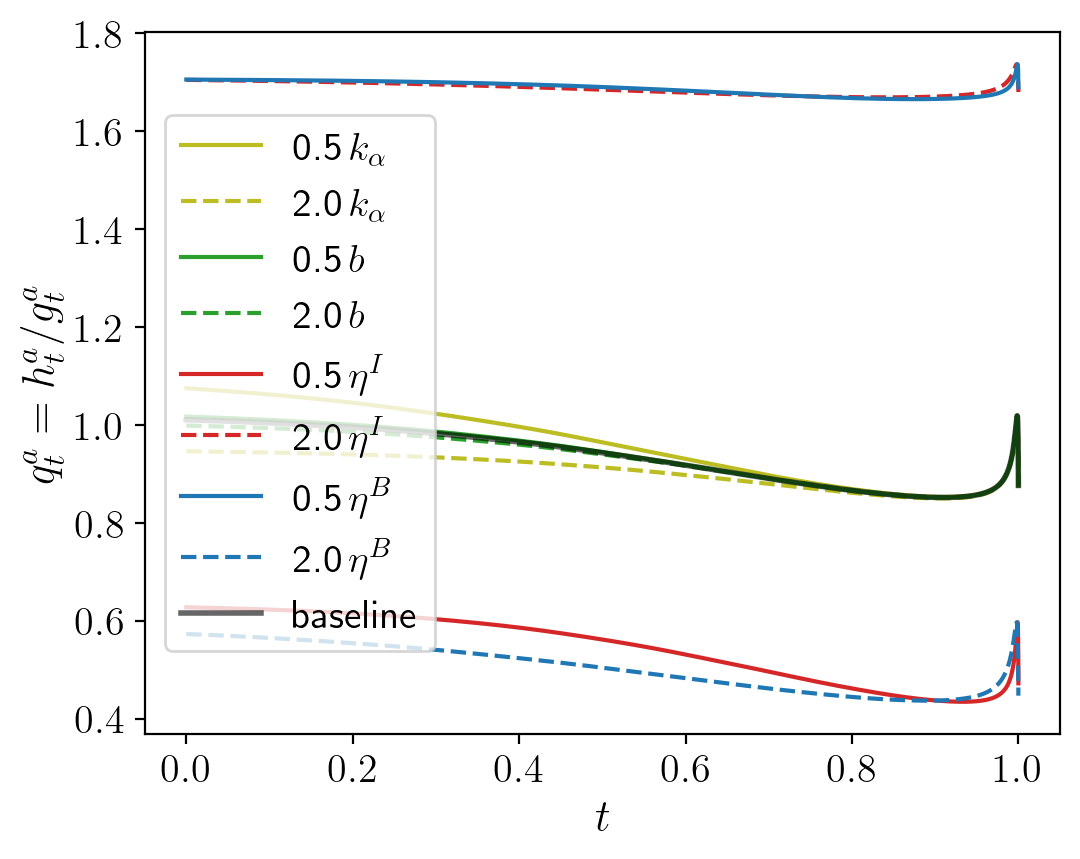

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(5.5, 4.4))
idx = np.argwhere(env.timesteps <= 1.)

for iv, stressed_variable in enumerate(to_stress_variables):
    for i, factor in enumerate(to_stress_factors):
        params_stressed = params.copy()
        params_stressed[stressed_variable] = factor * params_stressed[stressed_variable]
        env_stressing = utils.MFG_broker_vs_informed(**params_stressed)
        
        string_label = str(factor) + r'\,' + latex_stress_variable[iv]
        print(string_label)
        ratio_fct = env_stressing.ha / env_stressing.ga
        
        linestyle = '-' if i == 0 else '--'
        ax.plot(env_stressing.timesteps[idx], ratio_fct[idx], label=string_label, color=variable_colors[iv], linestyle=linestyle)
env_stressing = utils.MFG_broker_vs_informed(**params)
ratio_fct = env_stressing.ha / env_stressing.ga
ax.plot(env_stressing.timesteps[idx], ratio_fct[idx], color='black', linewidth=baseline_width, label=baseline_label, alpha=0.6)

ax.set_ylabel(r'$q^a_t = h^a_t /g^a_t$', fontsize = 16)
ax.set_xlabel(r'$t$', fontsize = 16)
resolution_value = 100

ax.legend(loc='center left')
plt.tight_layout() 
plt.savefig('figures/externalisation_plot_II.pdf', format="pdf", dpi=resolution_value)
plt.show()

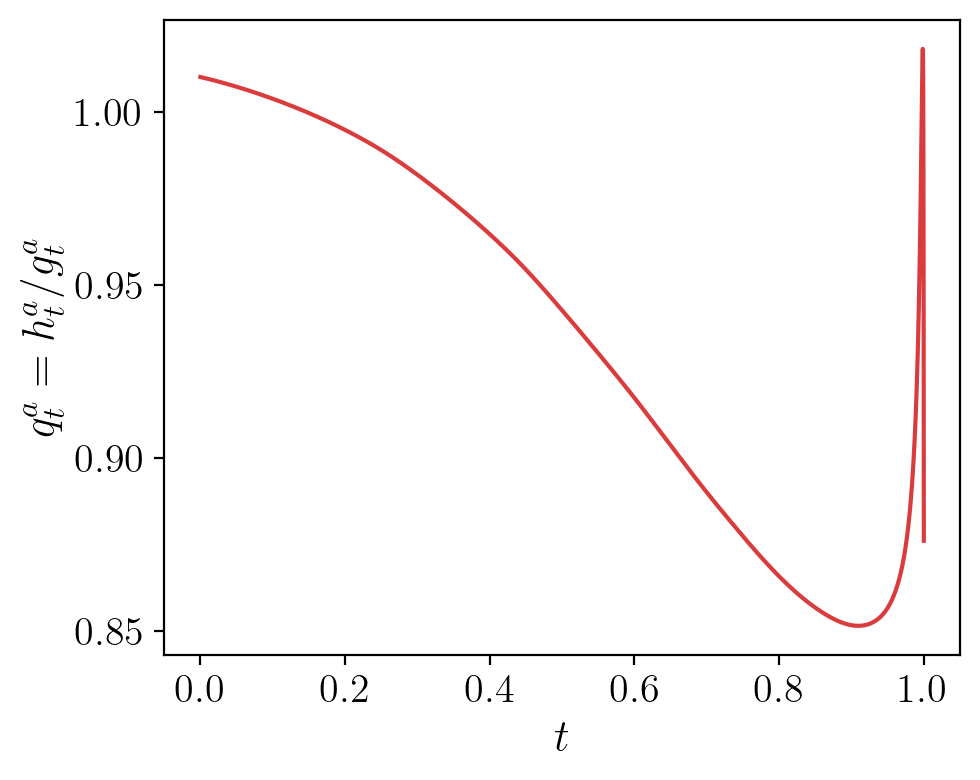

In [30]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
idx = np.argwhere(env.timesteps<=1.)
idx = idx[1:]
ax.plot(env.timesteps[idx], ratio_fct[idx],  'tab:red', alpha = 0.9)
ax.set_ylabel(r'$q^a_t = h^a_t /g^a_t$', fontsize = 16)
ax.set_xlabel(r'$t$', fontsize = 16)
resolution_value = 100
plt.tight_layout()

plt.savefig('figures/externalisation_plot_IIbis.pdf', format="pdf", dpi=resolution_value)
plt.show()